# EDA
In this notebook, I'll take a look at the data and create basic visualizations.

In [30]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import pickle

In [31]:
with open('PKL/timeseries_queens_p.pkl', 'rb') as fp:
    df = pickle.load(fp)

In [32]:
df.head(2)

,11375,11377,11355,11385,11373,11372,11101,11368,11354,11374,...,11411,11426,11428,11693,11004,11416,11436,11366,11363,11430
10/2003,0.006411,0.000258,0.006179,0.014454,0.009119,0.010880,-0.005191,0.007736,0.002224,0.014723,...,0.009728,0.008042,0.005779,-0.002823,0.007665,0.006849,0.009621,0.008860,-0.010106,0.007301
11/2003,0.009131,0.000237,0.005411,0.010600,0.007955,0.009376,-0.007290,0.010456,0.003193,0.011095,...,0.008055,0.006078,0.006113,0.003619,0.006517,0.005124,0.002296,0.009759,-0.002934,0.005545


## Train/Test Split
I'll create a train only dataset to look at.

In [33]:
trdf = df.iloc[:int(len(df)*.8)]

In [98]:
trdf.index = pd.to_datetime(trdf.index)

## Average Values of Homes
Let's see what's the average values of homes in Queens in general.

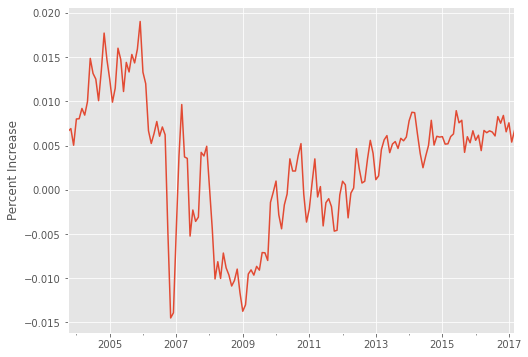

In [99]:
mean = np.mean(trdf, axis = 1)
ax = mean.plot(figsize = (8, 6))
plt.ylabel('Percent Increase')
plt.show()

We can see that the price increase dropped around the 2007 recession and unstable for a few years, then the price increase start to climb up. Recently the increase rate might have been start to stabilize. 

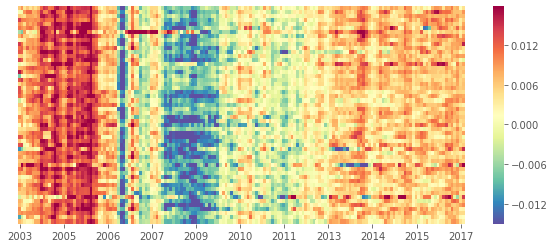

In [101]:
tmp = trdf.copy()
tmp.index = tmp.index.strftime('%Y')

fig = plt.figure(figsize = (10, 4))
ax = sns.heatmap(tmp.T, robust = True, cmap = 'Spectral_r', 
           yticklabels = False, xticklabels = 16)

plt.show()

We can see that most neighborhoods in the queens tend to have pretty similar shift in percentage changes, but there are definitely handful of outliers (e.g. LIC) that went against the trend. Let's try to plot couple locations that's furthest away from the average line.

In [102]:
# calculate absolute difference
diff_df = trdf.apply(lambda x: abs(x-mean))

In [103]:
# add up
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)

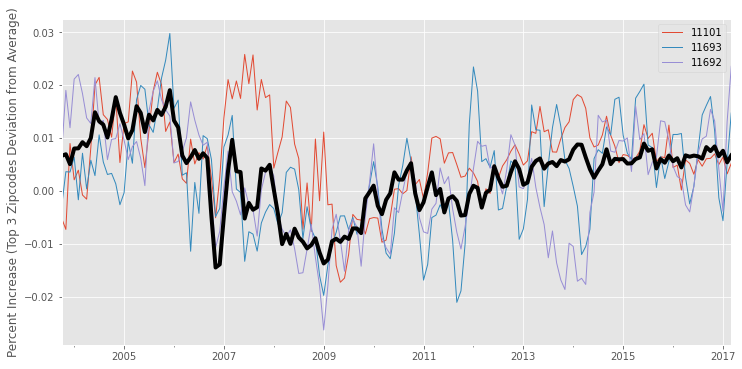

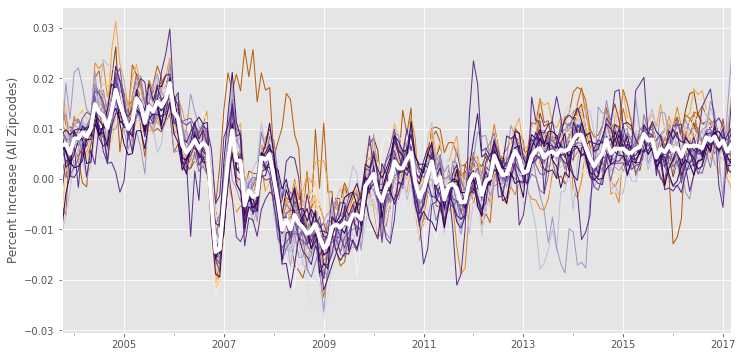

In [122]:
# choose top 3
max_diff_zips = diffs.index[0:3]

select_vals = trdf[max_diff_zips]
select_vals.index = pd.to_datetime(select_vals.index)
select_vals.plot(figsize = (12, 6), lw = 1)
mean.plot(c = 'black', lw = 4)
plt.ylabel('Percent Increase (Top 3 Zipcodes Deviation from Average)')
plt.show()

trdf.plot(figsize = (12, 6), lw = 1, cmap = 'PuOr')
mean.plot(c = 'white', lw = 4)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase (All Zipcodes)')
plt.show()
